In [32]:
!pip install tensorflow==2.13.0
from tensorflow.keras.utils import to_categorical

!pip install keras_preprocessing
from keras_preprocessing.image import load_img


[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
! pip install pandas


[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
! pip install numpy


[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import numpy as np
import pandas as pd
import os


In [36]:
from keras.models import Sequential

In [37]:
from keras.layers import Dense, Conv2D, Dropout,Flatten,MaxPooling2D

In [38]:
dir_train=r"C:\Users\saijy\Desktop\face emotion detection\images\train"
dir_test=r"C:\Users\saijy\Desktop\face emotion detection\images\test"

In [39]:
def createdataframe(dir):
    images_paths = []
    labels = []
    for label in os.listdir(dir):
        label_path = os.path.join(dir, label)
        for imagename in os.listdir(label_path):
            images_paths.append(os.path.join(label_path, imagename))
            labels.append(label)
        print(label, "completed")
    return images_paths, labels

In [40]:
train=pd.DataFrame()
train['train'],train['label']=createdataframe(dir_train)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [41]:
print(train)

                                                   train     label
0      C:\Users\saijy\Desktop\face emotion detection\...     angry
1      C:\Users\saijy\Desktop\face emotion detection\...     angry
2      C:\Users\saijy\Desktop\face emotion detection\...     angry
3      C:\Users\saijy\Desktop\face emotion detection\...     angry
4      C:\Users\saijy\Desktop\face emotion detection\...     angry
...                                                  ...       ...
28816  C:\Users\saijy\Desktop\face emotion detection\...  surprise
28817  C:\Users\saijy\Desktop\face emotion detection\...  surprise
28818  C:\Users\saijy\Desktop\face emotion detection\...  surprise
28819  C:\Users\saijy\Desktop\face emotion detection\...  surprise
28820  C:\Users\saijy\Desktop\face emotion detection\...  surprise

[28821 rows x 2 columns]


In [42]:
test=pd.DataFrame()
test['test'],test['label']=createdataframe(dir_test)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [43]:
print(test)


                                                   test     label
0     C:\Users\saijy\Desktop\face emotion detection\...     angry
1     C:\Users\saijy\Desktop\face emotion detection\...     angry
2     C:\Users\saijy\Desktop\face emotion detection\...     angry
3     C:\Users\saijy\Desktop\face emotion detection\...     angry
4     C:\Users\saijy\Desktop\face emotion detection\...     angry
...                                                 ...       ...
7061  C:\Users\saijy\Desktop\face emotion detection\...  surprise
7062  C:\Users\saijy\Desktop\face emotion detection\...  surprise
7063  C:\Users\saijy\Desktop\face emotion detection\...  surprise
7064  C:\Users\saijy\Desktop\face emotion detection\...  surprise
7065  C:\Users\saijy\Desktop\face emotion detection\...  surprise

[7066 rows x 2 columns]


In [44]:
! pip install tqdm


[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
from tqdm.notebook import tqdm

In [46]:
import numpy as np
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def extract_features(test):
    features = []
    for img_path in tqdm(test):
        img = load_img(img_path, color_mode="grayscale", target_size=(48, 48))  # Ensure size matches your model's input
        img_array = img_to_array(img)  # Convert the image to an array
        features.append(img_array)
    
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)  # Reshape to (num_images, 48, 48, 1)
    return features


In [47]:
! pip install Pillow


[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
train_features=extract_features(train['train'])

100%|███████████████████████████████████████████| 28821/28821 [03:41<00:00, 130.36it/s]


In [49]:
# If test is a list of image paths
test_features = extract_features(test['test'])

100%|█████████████████████████████████████████████| 7066/7066 [00:52<00:00, 133.51it/s]


In [50]:
x_train=train_features/255.0
x_test=test_features/255.0

In [51]:
!pip install scikit-learn


[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le=LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [59]:
y_train = le.transform(train['label'])  # Transforming the train labels to numeric format
test_labels = [os.path.basename(os.path.dirname(path)) for path in test['test']]  # Extracting labels from the test dataset
y_test = le.transform(test_labels)  # Transforming the test labels to numeric format

In [60]:
y_train=to_categorical(y_train,num_classes=7)
y_test=to_categorical(y_test,num_classes=7)

In [61]:

model = Sequential()
model=Sequential()
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [62]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [63]:
model.fit(x=x_train,y=y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
226/226 [==============================] - 459s 2s/step - loss: 1.8244 - accuracy: 0.2425 - val_loss: 1.8146 - val_accuracy: 0.2583
Epoch 2/50
226/226 [==============================] - 419s 2s/step - loss: 1.7889 - accuracy: 0.2554 - val_loss: 1.6962 - val_accuracy: 0.2978
Epoch 3/50
226/226 [==============================] - 439s 2s/step - loss: 1.6652 - accuracy: 0.3275 - val_loss: 1.5308 - val_accuracy: 0.3909
Epoch 4/50
226/226 [==============================] - 439s 2s/step - loss: 1.5189 - accuracy: 0.4035 - val_loss: 1.3851 - val_accuracy: 0.4847
Epoch 5/50
226/226 [==============================] - 471s 2s/step - loss: 1.4445 - accuracy: 0.4434 - val_loss: 1.3355 - val_accuracy: 0.4854
Epoch 6/50
226/226 [==============================] - 412s 2s/step - loss: 1.3981 - accuracy: 0.4596 - val_loss: 1.2802 - val_accuracy: 0.5116
Epoch 7/50
226/226 [==============================] - 432s 2s/step - loss: 1.3615 - accuracy: 0.4743 - val_loss: 1.2505 - val_accuracy: 0.5286

In [67]:
model_json=model.to_json()
with open(" emotiondetector.json",'w')as json_file:
    json_file.write(model_json)
    
model.save("emotiondetector.h5")

In [68]:
from keras.models import model_from_json

In [70]:
json_file=open(r"C:\Users\saijy\Desktop\face emotion detection\Emotion_detection\ emotiondetector.json")

In [72]:
json_file=open(r"C:\Users\saijy\Desktop\face emotion detection\Emotion_detection\ emotiondetector.json","r")
model_json=json_file.read()
json_file.close()
model=model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [73]:
label=["angry","disgust","fear","happy","neutral","sad"]

In [74]:
def ef(image):
    img=load_img(image,color_mode='grayscale')
    feature=np.array(img)
    feature=feature.reshape(1,48,48,1)
    return feature/255.0

In [76]:
image=r"C:\Users\saijy\Desktop\face emotion detection\images\test\angry\23.jpg"
print("original image is angry")
img=ef(image)
pred=model.predict(img)
pred_label=label[pred.argmax()]
print("model predcition is",pred_label)

original image is angry
1/1 [==============================] - 0s 214ms/step
model predcition is happy


In [78]:
! pip install matplotlib

     ---------------------------------------- 7.8/7.8 MB 4.1 MB/s eta 0:00:00
     -------------------------------------- 216.0/216.0 kB 6.4 MB/s eta 0:00:00
     -------------------------------------- 104.1/104.1 kB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 55.9/55.9 kB ? eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 4.7 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is happy
1/1 [==============================] - 0s 35ms/step
model prediction is happy


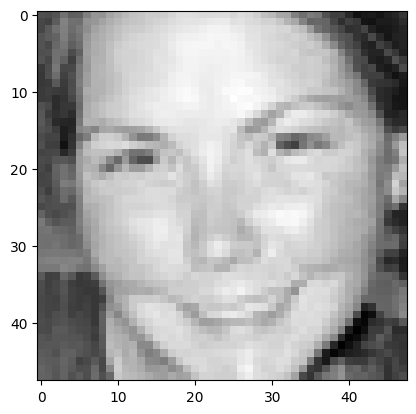

In [81]:
image=r"C:\Users\saijy\Desktop\face emotion detection\images\test\happy\8.jpg"
print("original image is happy")
img=ef(image)
pred=model.predict(img)
pred_label=label[pred.argmax()]
print("model prediction is",pred_label)
plt.imshow(img.reshape(48,48),cmap="gray")

original image is angry
1/1 [==============================] - 0s 54ms/step
model prediction is neutral


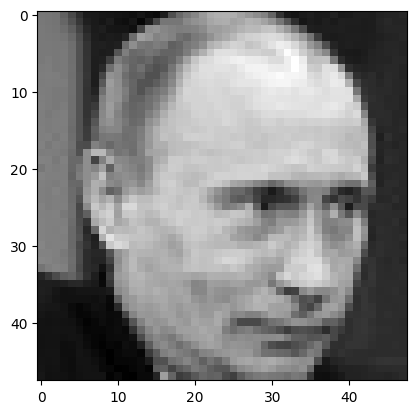

In [83]:
image=r"C:\Users\saijy\Desktop\face emotion detection\images\test\angry\65.jpg"
print("original image is angry")
img=ef(image)
pred=model.predict(img)
pred_label=label[pred.argmax()]
print("model prediction is",pred_label)
plt.imshow(img.reshape(48,48),cmap="gray")

original image is fear
1/1 [==============================] - 0s 59ms/step
model prediction is fear


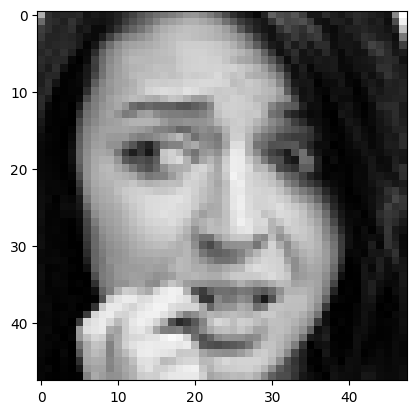

In [84]:
image=r"C:\Users\saijy\Desktop\face emotion detection\images\test\fear\21.jpg"
print("original image is fear")
img=ef(image)
pred=model.predict(img)
pred_label=label[pred.argmax()]
print("model prediction is",pred_label)
plt.imshow(img.reshape(48,48),cmap="gray")
